# Atividade 01: Microdados ENEM 2023 – Nordeste

Proposição 01:
- Calcular as médias por estado em relação a cada uma das provas do ENEM:
    - Ciências da Natureza
    - Ciências Humanas
    - Linguagens e Códigos
    - Matemática
- Plotar os resultados
- **Pergunta**: *Qual estado teve a maior e a menor média por prova?*

Proposição 02:
- Calcular a *moda* da faixa da renda dos inscritos para cada estado
- Calcular a média simples do ENEM (soma de todas as provas dividido por 5)
- Corelacionar a moda da faixa de renda de cada estado com a média de cada uma das provas, assim como a média do ENEM
- **Pergunta**: *Quanto maior a faixa de renda, maior a média do ENEM?*

## Setup

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregar CSV

Nota: Cada linha do `df` corresponde a um inscrito do ENEM.

In [2]:
microdados_df = pd.read_csv(
    filepath_or_buffer="../../datasets/microdados-enem-2023-nordeste.csv",
    sep=";",
    decimal=",",
    encoding="utf-8",
    encoding_errors="ignore"
)

microdados_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210060214087,2023,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,Nao,Sim
1,210059980948,2023,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, um",Nao,Nao,Nao
2,210059085130,2023,23 anos,Maculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2018,Não respondeu,...,"Sim, um",Nao,Sim,"Sim, um",Nao,Nao,"Sim, quatro ou mais",Nao,"Sim, um",Sim
3,210059980942,2023,22 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2019,Não respondeu,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Nao,"Sim, um",Sim
4,210058061534,2023,19 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,Nao,Nao,Nao,"Sim, um",Nao,Nao,"Sim, tres",Sim,Nao,Sim


## Tratamento dos dados

### 1. Selecionar somente as colunas necessárias

Em um novo `df`, selecionar as seguintes colunas:
- `SG_UF_PROVA` (sigla do estado onde o inscrito fez a prova)
- `NU_NOTA_CN` (nota da prova de ciências da natureza)
- `NU_NOTA_CH` (nota da prova de ciências humanas)
- `NU_NOTA_LC` (nota da prova de linguagens e códigos)
- `NU_NOTA_MT` (nota da prova de matemática)
- `NU_NOTA_REDACAO` (noda da redação)
- `Q006` (faixa da renda familiar)

In [3]:
notas_estados_microdados_df = microdados_df[[
    "SG_UF_PROVA",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "Q006"
]]

notas_estados_microdados_df.head()

,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,CE,459.0,508.5,507.2,466.7,880.0,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,560.0,"Ate R$ 1.320,00"
2,RN,644.9,620.2,626.9,736.3,860.0,"Ate R$ 1.320,00"
3,RN,510.8,313.4,388.5,415.6,560.0,Nenhuma Renda
4,PA,515.7,553.1,544.4,437.0,880.0,"Ate R$ 1.320,00"


### 2. Remover linhas com valor `NaN`

In [4]:
notas_estados_microdados_df = notas_estados_microdados_df.dropna(axis=0, how="any")
notas_estados_microdados_df.head()

,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,CE,459.0,508.5,507.2,466.7,880.0,"De R$ 1.320,01 ate R$ 1.980,00."
1,CE,402.5,379.2,446.9,338.3,560.0,"Ate R$ 1.320,00"
2,RN,644.9,620.2,626.9,736.3,860.0,"Ate R$ 1.320,00"
3,RN,510.8,313.4,388.5,415.6,560.0,Nenhuma Renda
4,PA,515.7,553.1,544.4,437.0,880.0,"Ate R$ 1.320,00"


## Proposição 01

- Calcular as médias por estado em relação a cada uma das provas do ENEM:
    - Ciências da Natureza
    - Ciências Humanas
    - Linguagens e Códigos
    - Matemática
- Plotar os resultados
- **Pergunta**: *Qual estado teve a maior e a menor média por prova?*

### Prova: Ciências da Natureza

Calcular média por estado

In [25]:
media_prova_cn_por_estado = pd.DataFrame(
    round(notas_estados_microdados_df.groupby("SG_UF_PROVA", as_index=False)["NU_NOTA_CN"].mean(), 2)
).rename(columns={"SG_UF_PROVA": "uf", "NU_NOTA_CN": "media_cn"})

media_prova_cn_por_estado

,uf,media_cn
0,AL,480.43
1,BA,483.52
2,CE,482.80
3,MA,466.71
4,PA,472.15
5,PB,485.21
6,PI,476.47
7,RN,493.44
8,SE,485.29


Plotar gráfico de distribuição

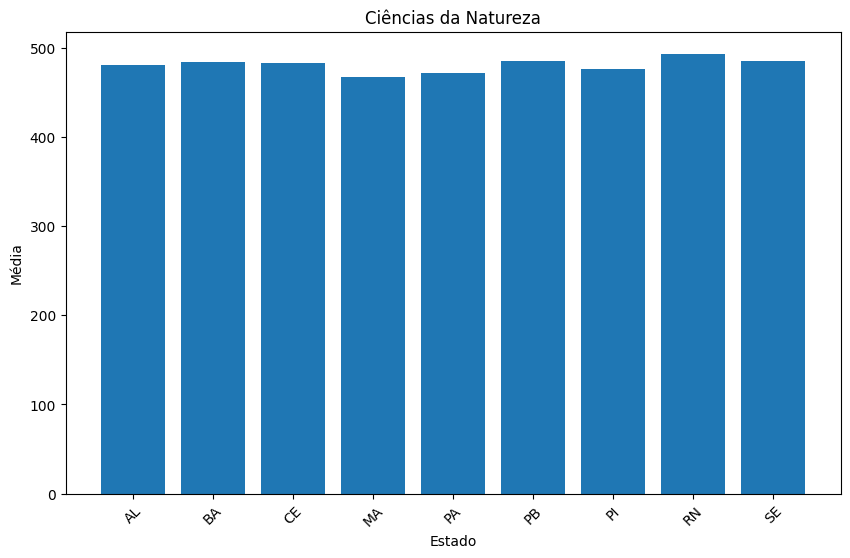

In [26]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_cn_por_estado["uf"], media_prova_cn_por_estado["media_cn"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Ciências da Natureza")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [27]:
maior_media_cn = max(media_prova_cn_por_estado["media_cn"])
uf_maior_media_cn = media_prova_cn_por_estado[media_prova_cn_por_estado["media_cn"] == maior_media_cn].iloc[0]["uf"]

menor_media_cn = min(media_prova_cn_por_estado["media_cn"])
uf_menor_media_cn = media_prova_cn_por_estado[media_prova_cn_por_estado["media_cn"] == menor_media_cn].iloc[0]["uf"]

print("Maior Média:", maior_media_cn)
print("UF:", uf_maior_media_cn)

print("\nMenor Média:", menor_media_cn)
print("UF:", uf_menor_media_cn)

Maior Média: 493.44
UF: RN

Menor Média: 466.71
UF: MA


### Prova: Ciências Humanas

Calcular média por estado

In [28]:
media_prova_ch_por_estado = pd.DataFrame(
    round(notas_estados_microdados_df.groupby("SG_UF_PROVA", as_index=False)["NU_NOTA_CH"].mean(), 2)
).rename(columns={"SG_UF_PROVA": "uf", "NU_NOTA_CH": "media_ch"})

media_prova_ch_por_estado

,uf,media_ch
0,AL,506.36
1,BA,513.25
2,CE,511.58
3,MA,493.70
4,PA,500.21
5,PB,513.35
6,PI,499.57
7,RN,523.38
8,SE,511.64


Plotar gráfico de distribuição

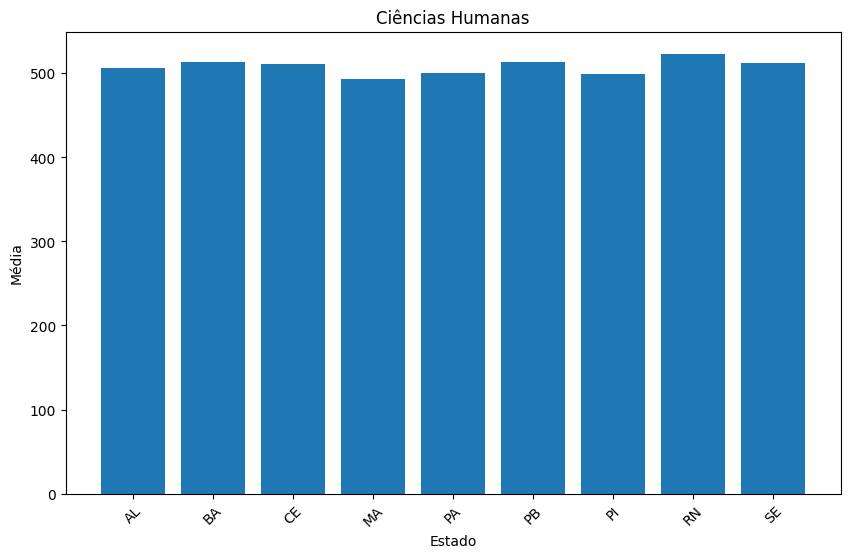

In [29]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_ch_por_estado["uf"], media_prova_ch_por_estado["media_ch"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Ciências Humanas")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [30]:
maior_media_ch = max(media_prova_ch_por_estado["media_ch"])
uf_maior_media_ch = media_prova_ch_por_estado[media_prova_ch_por_estado["media_ch"] == maior_media_ch].iloc[0]["uf"]

menor_media_ch = min(media_prova_ch_por_estado["media_ch"])
uf_menor_media_ch = media_prova_ch_por_estado[media_prova_ch_por_estado["media_ch"] == menor_media_ch].iloc[0]["uf"]

print("Maior Média:", maior_media_ch)
print("UF:", uf_maior_media_cn)

print("\nMenor Média:", menor_media_ch)
print("UF:", uf_menor_media_ch)

Maior Média: 523.38
UF: RN

Menor Média: 493.7
UF: MA


### Prova: Liguagens e Códigos

Calcular média por estado

In [31]:
media_prova_lc_por_estado = pd.DataFrame(
    round(notas_estados_microdados_df.groupby("SG_UF_PROVA", as_index=False)["NU_NOTA_LC"].mean(), 2)
).rename(columns={"SG_UF_PROVA": "uf", "NU_NOTA_LC": "media_lc"})

media_prova_lc_por_estado

,uf,media_lc
0,AL,501.83
1,BA,506.81
2,CE,508.89
3,MA,489.85
4,PA,493.16
5,PB,508.43
6,PI,496.55
7,RN,516.74
8,SE,505.45


Plotar gráfico de distribuição

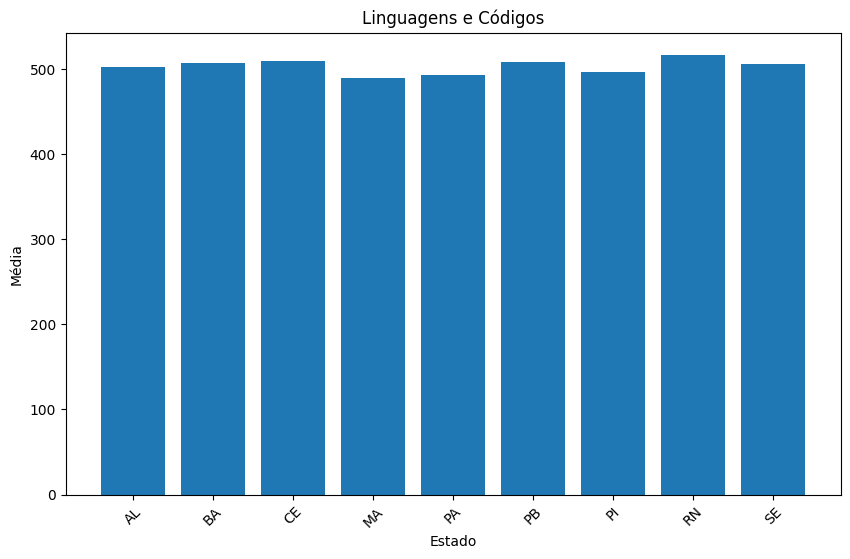

In [32]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_lc_por_estado["uf"], media_prova_lc_por_estado["media_lc"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Linguagens e Códigos")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [33]:
maior_media_lc = max(media_prova_lc_por_estado["media_lc"])
uf_maior_media_lc = media_prova_lc_por_estado[media_prova_lc_por_estado["media_lc"] == maior_media_lc].iloc[0]["uf"]

menor_media_lc = min(media_prova_lc_por_estado["media_lc"])
uf_menor_media_lc = media_prova_lc_por_estado[media_prova_lc_por_estado["media_lc"] == menor_media_lc].iloc[0]["uf"]

print("Maior Média:", maior_media_lc)
print("UF:", uf_maior_media_lc)

print("\nMenor Média:", menor_media_lc)
print("UF:", uf_menor_media_lc)

Maior Média: 516.74
UF: RN

Menor Média: 489.85
UF: MA


### Prova: Matemática

Calcular média por estado

In [34]:
media_prova_mt_por_estado = pd.DataFrame(
    round(notas_estados_microdados_df.groupby("SG_UF_PROVA", as_index=False)["NU_NOTA_MT"].mean(), 2)
).rename(columns={"SG_UF_PROVA": "uf", "NU_NOTA_MT": "media_mt"})

media_prova_mt_por_estado

,uf,media_mt
0,AL,508.33
1,BA,506.01
2,CE,523.33
3,MA,482.91
4,PA,484.25
5,PB,513.65
6,PI,502.65
7,RN,525.36
8,SE,509.58


Plotar gráfico de distribuição

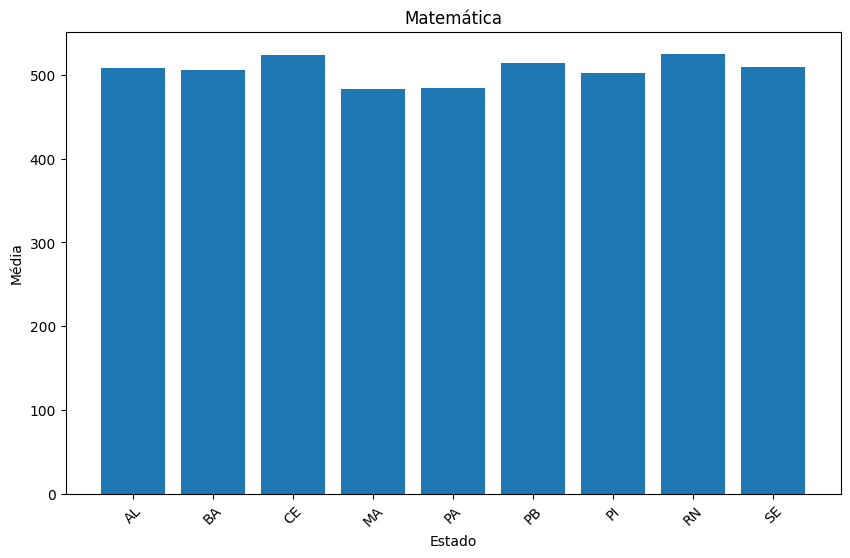

In [35]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_mt_por_estado["uf"], media_prova_mt_por_estado["media_mt"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Matemática")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [36]:
maior_media_mt = max(media_prova_mt_por_estado["media_mt"])
uf_maior_media_mt = media_prova_mt_por_estado[media_prova_mt_por_estado["media_mt"] == maior_media_mt].iloc[0]["uf"]

menor_media_mt = min(media_prova_mt_por_estado["media_mt"])
uf_menor_media_mt = media_prova_mt_por_estado[media_prova_mt_por_estado["media_mt"] == menor_media_mt].iloc[0]["uf"]

print("Maior Média:", maior_media_mt)
print("UF:", uf_maior_media_mt)

print("\nMenor Média:", menor_media_mt)
print("UF:", uf_menor_media_mt)

Maior Média: 525.36
UF: RN

Menor Média: 482.91
UF: MA


### Prova: Redação

Calcular média por estado

In [37]:
media_prova_redacao_por_estado = pd.DataFrame(
    round(notas_estados_microdados_df.groupby("SG_UF_PROVA", as_index=False)["NU_NOTA_REDACAO"].mean(), 2)
).rename(columns={"SG_UF_PROVA": "uf", "NU_NOTA_REDACAO": "media_redacao"})

media_prova_redacao_por_estado

,uf,media_redacao
0,AL,606.55
1,BA,613.63
2,CE,618.06
3,MA,589.23
4,PA,593.63
5,PB,626.23
6,PI,616.07
7,RN,625.78
8,SE,636.25


Plotar gráfico de distribuição

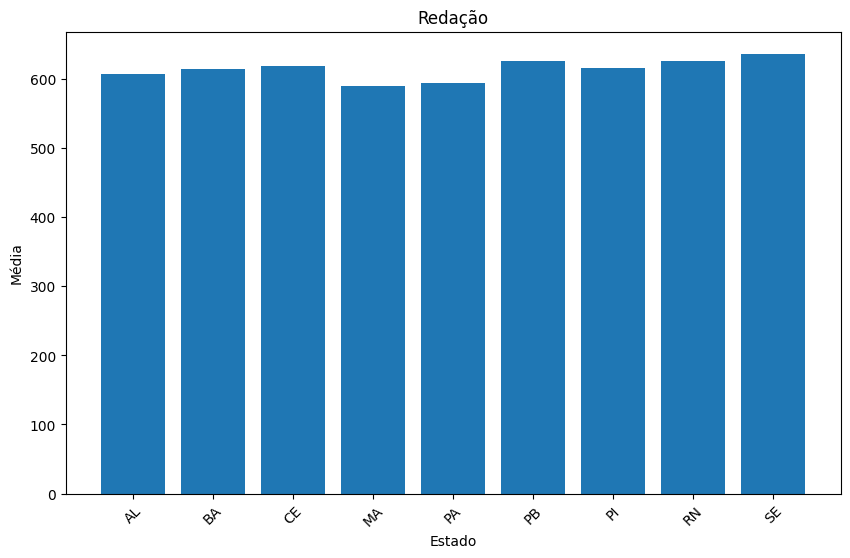

In [38]:
plt.figure(figsize=(10,6))
plt.bar(media_prova_redacao_por_estado["uf"], media_prova_redacao_por_estado["media_redacao"])
plt.xlabel("Estado")
plt.ylabel("Média")
plt.title("Redação")
plt.xticks(rotation=45)
plt.show()

Estados com maior e menor média

In [39]:
maior_media_redacao = max(media_prova_redacao_por_estado["media_redacao"])
uf_maior_media_redacao = media_prova_redacao_por_estado[media_prova_redacao_por_estado["media_redacao"] == maior_media_redacao].iloc[0]["uf"]

menor_media_redacao = min(media_prova_redacao_por_estado["media_redacao"])
uf_menor_media_redacao = media_prova_redacao_por_estado[media_prova_redacao_por_estado["media_redacao"] == menor_media_redacao].iloc[0]["uf"]

print("Maior Média:", maior_media_redacao)
print("UF:", uf_maior_media_redacao)

print("\nMenor Média:", menor_media_redacao)
print("UF:", uf_menor_media_redacao)

Maior Média: 636.25
UF: SE

Menor Média: 589.23
UF: MA


## Proposição 02

- Calcular a *moda* da faixa da renda dos inscritos para cada estado
- Calcular a média simples do ENEM (soma de todas as provas dividido por 5)
- Corelacionar a moda da faixa de renda de cada estado com a média de cada uma das provas, assim como a média do ENEM
- **Pergunta**: *Quanto maior a faixa de renda, maior a média do ENEM?*

Em um novo `df`, selecionar somente as colunas `SG_UF_PROVA`, `Q006` e agrupar por `SG_UF_PROVA`

In [20]:
faixa_renda_estado_agrupado_df = notas_estados_microdados_df[["SG_UF_PROVA", "Q006"]].groupby("SG_UF_PROVA")

Em um novo `df`, unificar a moda com as médias de cada prova

In [44]:
dados_unificados_enem_ne = {
    "uf": [],
    "moda_faixa_renda": [],
    "media_cn": [],
    "media_ch": [],
    "media_lc": [],
    "media_mt": [],
    "media_redacao": [],
    "media_enem": []
}

for uf, grupo in faixa_renda_estado_agrupado_df:
    dados_unificados_enem_ne["uf"].append(uf)

    dados_unificados_enem_ne["moda_faixa_renda"].append(
        grupo["Q006"].mode()[0]
    )

    dados_unificados_enem_ne["media_cn"].append(
        (media_prova_cn_por_estado[media_prova_cn_por_estado["uf"] == uf].iloc[0]["media_cn"])
    )

    dados_unificados_enem_ne["media_ch"].append(
        (media_prova_ch_por_estado[media_prova_ch_por_estado["uf"] == uf].iloc[0]["media_ch"])
    )

    dados_unificados_enem_ne["media_lc"].append(
        (media_prova_lc_por_estado[media_prova_lc_por_estado["uf"] == uf].iloc[0]["media_lc"])
    )

    dados_unificados_enem_ne["media_mt"].append(
        (media_prova_mt_por_estado[media_prova_mt_por_estado["uf"] == uf].iloc[0]["media_mt"])
    )

    dados_unificados_enem_ne["media_redacao"].append(
        (media_prova_redacao_por_estado[media_prova_redacao_por_estado["uf"] == uf].iloc[0]["media_redacao"])
    )

    media_enem = (
        dados_unificados_enem_ne["media_cn"][-1] +
        dados_unificados_enem_ne["media_ch"][-1] +
        dados_unificados_enem_ne["media_lc"][-1] +
        dados_unificados_enem_ne["media_mt"][-1] +
        dados_unificados_enem_ne["media_redacao"][-1]
    ) / 5

    dados_unificados_enem_ne["media_enem"].append(
        round(media_enem, 2)
    )

dados_unificados_enem_ne_df = pd.DataFrame(dados_unificados_enem_ne)
dados_unificados_enem_ne_df

,uf,moda_faixa_renda,media_cn,media_ch,media_lc,media_mt,media_redacao,media_enem
0,AL,"Ate R$ 1.320,00",480.43,506.36,501.83,508.33,606.55,520.70
1,BA,"Ate R$ 1.320,00",483.52,513.25,506.81,506.01,613.63,524.64
2,CE,"Ate R$ 1.320,00",482.80,511.58,508.89,523.33,618.06,528.93
3,MA,"Ate R$ 1.320,00",466.71,493.70,489.85,482.91,589.23,504.48
4,PA,"Ate R$ 1.320,00",472.15,500.21,493.16,484.25,593.63,508.68
5,PB,"Ate R$ 1.320,00",485.21,513.35,508.43,513.65,626.23,529.37
6,PI,"Ate R$ 1.320,00",476.47,499.57,496.55,502.65,616.07,518.26
7,RN,"Ate R$ 1.320,00",493.44,523.38,516.74,525.36,625.78,536.94
8,SE,"Ate R$ 1.320,00",485.29,511.64,505.45,509.58,636.25,529.64


**Pergunta**: *Quanto maior a faixa de renda, maior a média do ENEM?*
- *Não necessariamente, a maioria das faixas de renda que aparecem em todos os estados é a primeira (a mais baixa). Portanto, não é possível afirmar que ela influencie nor valor das médias, especialmente para os estados que tiveram as maiores, como RN, SE e PB, por exemplo.*